In [164]:
import pandas as pd
import numpy as np

In [165]:
df = pd.read_csv("mumbai_housing_mix12_20k.csv")

In [166]:
df["income_cat"] = pd.cut(df["median_income"], bins = [0, 1.5, 3.0 ,4.5, 6.0, np.inf ], labels = [1,2,3,4,5])

In [167]:
from sklearn.model_selection import StratifiedShuffleSplit
split = StratifiedShuffleSplit(n_splits = 1 , test_size = 0.2, random_state = 42)
for train_index, test_index in split.split(df, df["income_cat"]):
    strat_train_set = df.iloc[train_index]
    strat_test_set = df.iloc[test_index]
    

In [168]:
#Lets remove the income_cat coloum
for sett in (strat_train_set,strat_test_set):
    sett.drop ("income_cat", axis = 1 , inplace = True)

C:\Users\hinda\AppData\Local\Temp\ipykernel_21876\3161952182.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sett.drop ("income_cat", axis = 1 , inplace = True)
C:\Users\hinda\AppData\Local\Temp\ipykernel_21876\3161952182.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sett.drop ("income_cat", axis = 1 , inplace = True)


In [169]:
df = strat_train_set.copy()

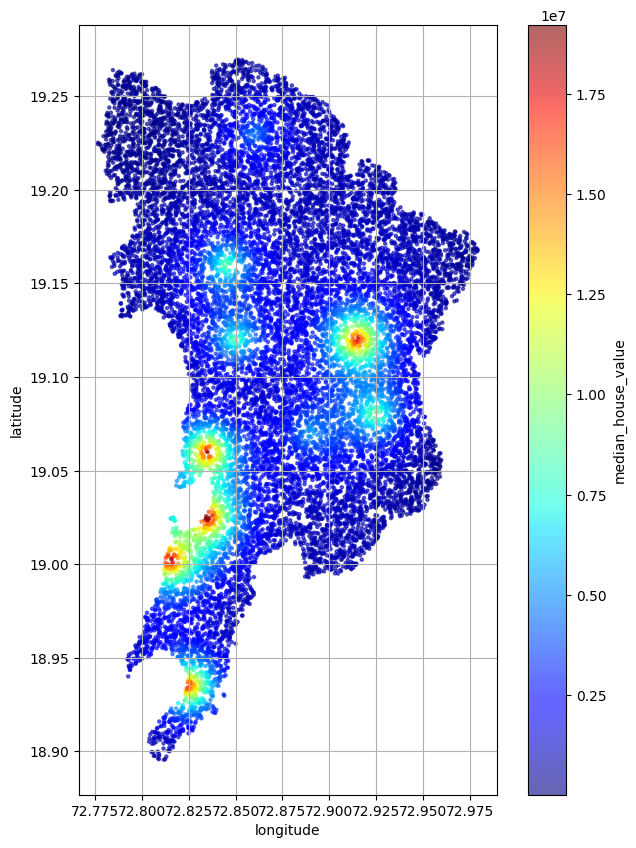

In [182]:
import matplotlib.pyplot as plt
df.plot(kind="scatter", x="longitude", y="latitude", c="median_house_value", cmap="jet",figsize=(8, 10),s=5, alpha=0.6)
plt.gca().set_aspect('equal', 'box')
plt.grid(True)


<Axes: xlabel='longitude', ylabel='latitude'>

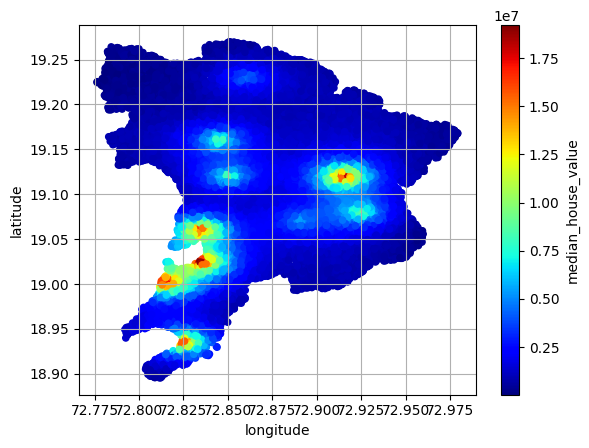

In [171]:
df.plot(kind="scatter", x="longitude", y="latitude", grid=True, cmap="jet", c="median_house_value")

In [172]:
df.drop(labels="ocean_proximity", inplace=True, axis=1)
df.corr()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
longitude,1.000000,-0.022144,0.002084,-0.001721,0.012183,-0.002138,-0.001660,-0.062517,-0.086383
latitude,-0.022144,1.000000,0.007615,-0.005157,-0.006298,-0.000339,0.006890,-0.289741,-0.384609
housing_median_age,0.002084,0.007615,1.000000,-0.003336,0.003191,-0.004599,0.003502,0.005217,-0.002564
total_rooms,-0.001721,-0.005157,-0.003336,1.000000,-0.002407,0.001237,-0.001867,0.004771,0.007614
total_bedrooms,0.012183,-0.006298,0.003191,-0.002407,1.000000,-0.001643,-0.008651,-0.003177,-0.000957
population,-0.002138,-0.000339,-0.004599,0.001237,-0.001643,1.000000,-0.008995,0.001114,-0.005774
households,-0.001660,0.006890,0.003502,-0.001867,-0.008651,-0.008995,1.000000,-0.001308,-0.002486
median_income,-0.062517,-0.289741,0.005217,0.004771,-0.003177,0.001114,-0.001308,1.000000,0.771467
median_house_value,-0.086383,-0.384609,-0.002564,0.007614,-0.000957,-0.005774,-0.002486,0.771467,1.000000


array([[<Axes: xlabel='housing_median_age', ylabel='housing_median_age'>,
        <Axes: xlabel='median_income', ylabel='housing_median_age'>,
        <Axes: xlabel='median_house_value', ylabel='housing_median_age'>],
       [<Axes: xlabel='housing_median_age', ylabel='median_income'>,
        <Axes: xlabel='median_income', ylabel='median_income'>,
        <Axes: xlabel='median_house_value', ylabel='median_income'>],
       [<Axes: xlabel='housing_median_age', ylabel='median_house_value'>,
        <Axes: xlabel='median_income', ylabel='median_house_value'>,
        <Axes: xlabel='median_house_value', ylabel='median_house_value'>]],
      dtype=object)

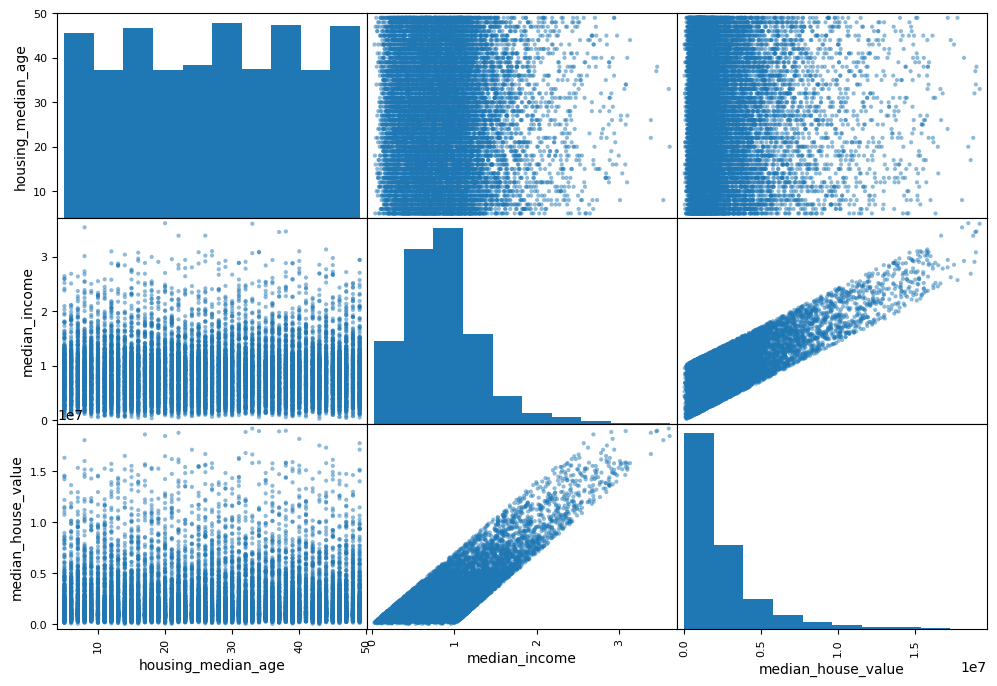

In [180]:
from pandas.plotting import scatter_matrix
attributes = ["housing_median_age","median_income","median_house_value"]
scatter_matrix(df[attributes], figsize=(12,8))

In [1]:
import os
import joblib
import numpy as np
import pandas as pd 

from sklearn.model_selection import StratifiedShuffleSplit
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler, OneHotEncoder

import pandas as pd
import numpy as np

from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import root_mean_squared_error

from sklearn.model_selection import cross_val_score


In [2]:
MODEL_FILE = "model.pkl"
PIPELINE_FILE = "pipeline.pkl"

In [4]:
def build_pipelines(num_attribs, cat_attribs):
    num_pipeline =  Pipeline([("imputer", SimpleImputer(strategy="median")),  
                            ("sclar", StandardScaler())])
    cat_pipeline =  Pipeline([("onehot", OneHotEncoder(handle_unknown="ignore"))])
    full_pipeline = ColumnTransformer([
        ("num", num_pipeline, num_attribs),
        ("cat", cat_pipeline, cat_attribs)])

    return full_pipeline

if not os.path.exists(MODEL_FILE):
    # Lets train the model

    housing = pd.read_csv("mumbai_housing.csv")

    housing["income_cat"] = pd.cut(housing["median_income"], 
                                    bins=  [0,1.5,3,4.5,6,np.inf],
                                    labels=[1,2,3,4,5] )

    split = StratifiedShuffleSplit(n_splits=1, test_size=0.2, random_state=42)

    for train_index, test_index in split.split(housing, housing["income_cat"]):
        housing.iloc[test_index].drop("income_cat", axis=1).to_csv("input.csv", index=False)
        housing = housing.iloc[train_index].drop("income_cat", axis=1)
        

    housing_labels = housing["median_house_value"].copy()
    housing_features = housing.drop("median_house_value", axis=1)


    num_attribs = housing_features.drop("ocean_proximity", axis=1).columns.tolist()
    cat_attribs = ["ocean_proximity"]

    pipelines = build_pipelines(num_attribs, cat_attribs)
    housing_prepared = pipelines.fit_transform(housing_features)
    print(housing_prepared)

    model =  RandomForestRegressor(random_state=42)
    model.fit(housing_prepared,housing_labels)

    joblib.dump(model,MODEL_FILE)
    joblib.dump(pipelines,PIPELINE_FILE)
    print("Model is trianed congrats !!")

else:
    #lets do inference
    model = joblib.load(MODEL_FILE)
    pipeline = joblib.load(PIPELINE_FILE)

    input_data = pd.read_csv('input.csv')
    transformed_input = pipeline.transform(input_data)
    preditions = np.maximum(0, model.predict(transformed_input))
    input_data['median_house_value'] = preditions
    input_data.to_csv('output.csv', index=False)
    print("Inferece is complete enjoy !")

Inferece is complete enjoy !


IndentationError: unexpected indent (3067495770.py, line 2)